In [24]:
#Description: This program uses an artifical reccurent neural network called long short term memory (LSTM) and we gonna use this to predict the closing stock price of a corparation. E.g apple Inc.
# by use the past 60 days stock price.

In [25]:

# Import the libraries
import math
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
!pip install yfinance

In [27]:
yf.pdr_override()
# Get the stock quote
df = pdr.get_data_yahoo("NFLX", start="2014-01-01", end="2023-09-01")
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,52.401428,52.511429,51.542858,51.831429,51.831429,12325600
2014-01-03,52.000000,52.495712,51.842857,51.871429,51.871429,10817100
2014-01-06,51.889999,52.044285,50.475716,51.367142,51.367142,15501500
2014-01-07,49.684284,49.698570,48.152859,48.500000,48.500000,36167600
2014-01-08,48.104286,49.425713,48.074287,48.712856,48.712856,20001100
...,...,...,...,...,...,...
2023-08-25,412.000000,419.250000,407.559998,416.029999,416.029999,5390900
2023-08-28,418.040009,419.829987,413.269989,418.059998,418.059998,2928600
2023-08-29,416.000000,432.170013,414.500000,429.989990,429.989990,4486700


In [28]:
# Get the number of rows and columns in the data set
df.shape

(2433, 6)

Text(0, 0.5, 'Close Price USD ($)')

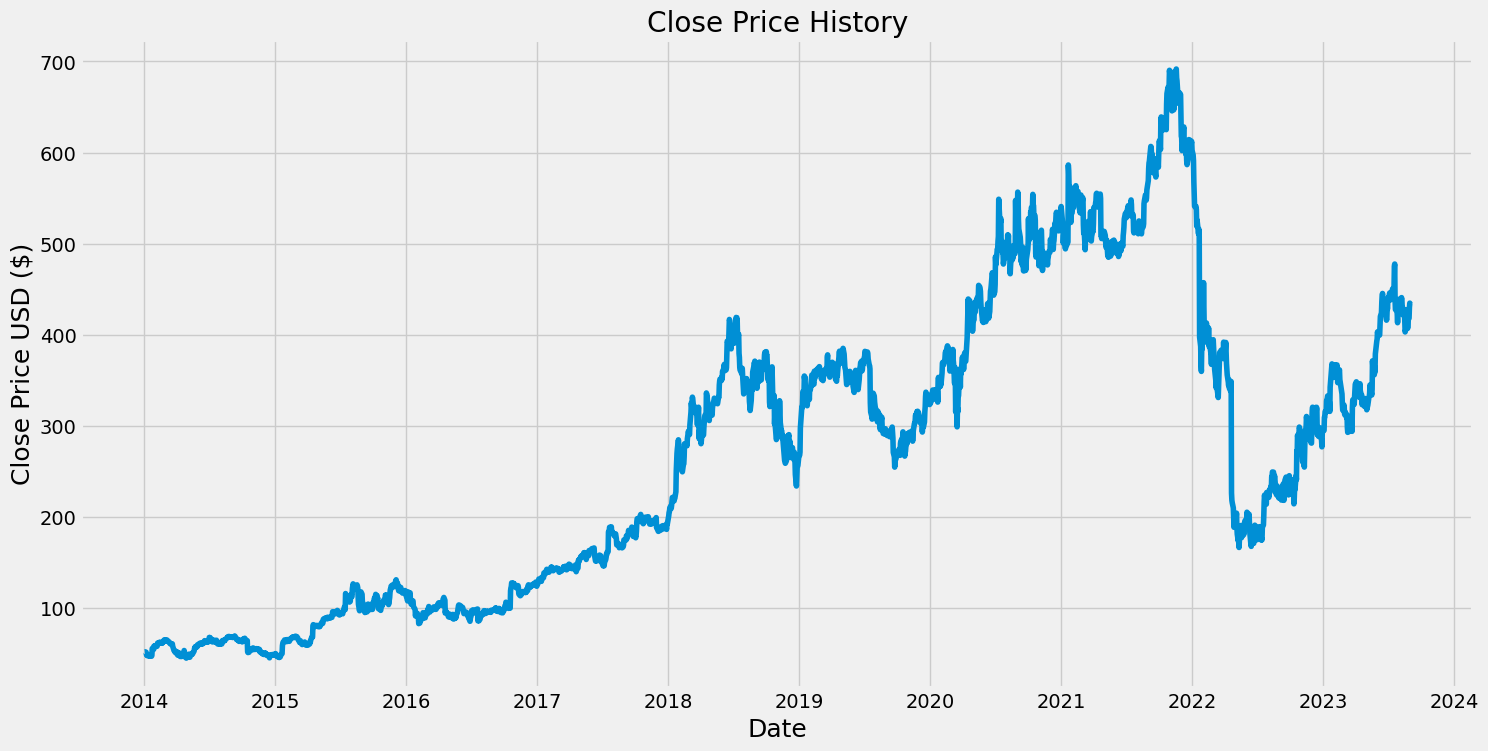

In [29]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [30]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1947


In [31]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.01073633],
       [0.01079817],
       [0.01001851],
       ...,
       [0.59539447],
       [0.6026301 ],
       [0.60109946]])

In [32]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01073633, 0.01079817, 0.01001851, 0.00558572, 0.00591481,
       0.0050446 , 0.00396014, 0.00499159, 0.00524558, 0.00357141,
       0.00385854, 0.00349632, 0.00320257, 0.00431131, 0.01645677,
       0.01587368, 0.01480248, 0.02044341, 0.01904091, 0.01997959,
       0.02100883, 0.01991554, 0.02025347, 0.01992437, 0.0206952 ,
       0.02556972, 0.02567132, 0.0264554 , 0.02533782, 0.02702082,
       0.02679112, 0.02708708, 0.02518321, 0.02666744, 0.02606668,
       0.02932888, 0.03066071, 0.02972422, 0.03048401, 0.02902629,
       0.02901745, 0.0310914 , 0.03076451, 0.03010412, 0.02963146,
       0.02777176, 0.02722623, 0.02702745, 0.02558739, 0.02435717,
       0.02396624, 0.02342069, 0.02338535, 0.02430858, 0.02027113,
       0.01428786, 0.01250768, 0.01282572, 0.01103671, 0.0098639 ])]
[0.008353176935486886]

[array([0.01073633, 0.01079817, 0.01001851, 0.00558572, 0.00591481,
       0.0050446 , 0.00396014, 0.00499159, 0.00524558, 0.00357141,
       0.00385854, 0.00349632, 0.0

In [33]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1887, 60, 1)

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25,))
model.add(Dense(1))

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1887/1887 [==============================] - 87s 44ms/step - loss: 0.0019


In [38]:
# Create the testing dataset
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [39]:
# Convert the data into a numpy array
x_test = np.array(x_test)

In [40]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 23ms/step


In [42]:
# Get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

23.321020105264044

<ipython-input-43-078d62b55ab9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

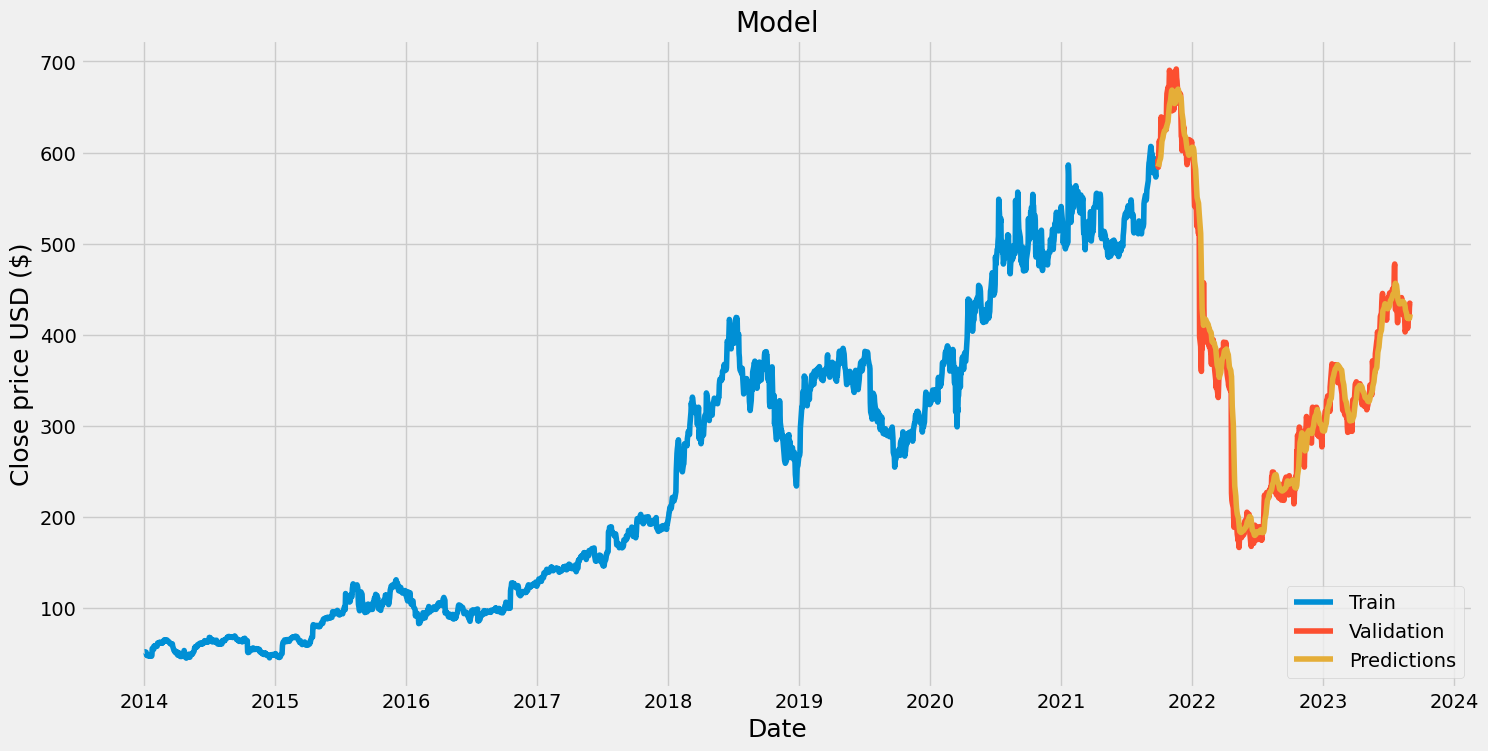

In [43]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show
#blue is the data the model was trained on
# red/orange is the actual values for the rest of these days, closing stock prices
# yellow is the model predictions

In [44]:
# Show the valid and the predicted prices
valid
# Shows the actual prices

,Close,Predictions
Date,,
2021-09-27,592.640015,584.397461
2021-09-28,583.849976,585.563171
2021-09-29,599.059998,585.768677
2021-09-30,610.340027,587.100769
2021-10-01,613.150024,589.946899
...,...,...
2023-08-25,416.029999,417.871826
2023-08-28,418.059998,417.687561
2023-08-29,429.989990,417.987946


In [45]:
# Get the quote
nike_quote = pdr.get_data_yahoo("NKE", start="2014-01-01", end="2022-07-01")
# Create a new dataframe
new_df = nike_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data to be 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 33ms/step
[[108.40037]]


In [46]:
# Get the actual quote
nike_quote2 = pdr.get_data_yahoo("NKE", start="2022-07-01", end="2022-08-01")
print(nike_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2022-07-01    101.180000
2022-07-05    104.320000
2022-07-06    104.230003
2022-07-07    108.129997
2022-07-08    107.930000
2022-07-11    105.110001
2022-07-12    103.760002
2022-07-13    105.110001
2022-07-14    103.220001
2022-07-15    104.699997
2022-07-18    103.940002
2022-07-19    109.190002
2022-07-20    111.110001
2022-07-21    111.620003
2022-07-22    109.120003
2022-07-25    109.279999
2022-07-26    105.199997
2022-07-27    107.860001
2022-07-28    112.230003
2022-07-29    114.919998
Name: Close, dtype: float64
